In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\satyam\Desktop\phase-3-data\phase-3-3\raw.githubusercontent.com_dsrscientist_Data-Science-ML-Capstone-Projects_master_Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
data.drop(['_c39'],inplace=True,axis=1) # remove unwanted column

In [4]:
data.isna().sum()  #checking null values

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [7]:
#separting numerical and categorical values
# for categorical
categorical=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical.append(i)
print('categorical=',categorical)
print('\n')
# for numerical
numerical=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical.append(i)
print('numerical=',numerical)


categorical= ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


numerical= ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


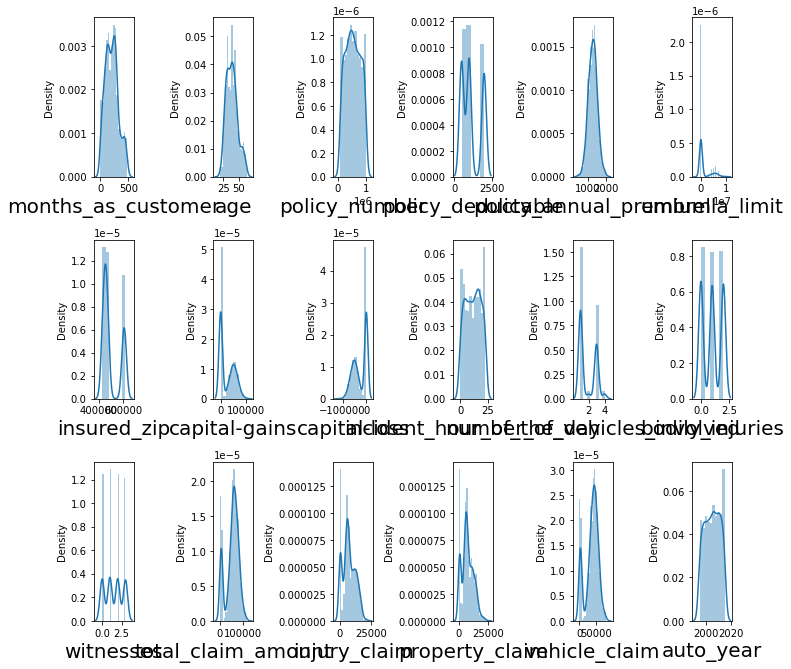

In [8]:
#cheking ditribution of plot
plt.figure(figsize=(10,15),facecolor='w')
plotnumber=1
for column in numerical:
    if plotnumber<=85:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()    

In [12]:
# fixing outlier with z score
from scipy.stats import zscore
z_score=zscore(data[['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']])
abs_z_score=np.abs(z_score)
filtering_enter=(abs_z_score<3).all(axis=1)
data=data[filtering_enter]  # reasining filter data to main data
data.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,980.000000,980.000000,980.000000,980.000000,980.000000,9.800000e+02,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,204.613265,38.973469,546231.664286,1137.244898,1257.206510,9.918367e+05,500661.760204,25287.959184,-26692.448980,11.688776,1.834694,0.997959,1.481633,52693.010204,7426.244898,7386.173469,37880.591837,2005.133673
std,115.420174,9.184040,257473.945100,611.258486,241.568379,2.120943e+06,71376.814338,27918.880339,27951.834834,6.966436,1.018331,0.817328,1.112043,26341.641716,4885.829062,4793.054917,18846.130656,6.014240
min,0.000000,19.000000,100804.000000,500.000000,538.170000,-1.000000e+06,430104.000000,0.000000,-93600.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,116.000000,32.000000,335980.250000,500.000000,1087.875000,0.000000e+00,448458.500000,0.000000,-51325.000000,6.000000,1.000000,0.000000,0.000000,41697.500000,4277.500000,4480.000000,30220.000000,2000.000000
50%,200.000000,38.000000,533940.500000,1000.000000,1257.200000,0.000000e+00,466391.500000,0.000000,-23250.000000,12.000000,1.000000,1.000000,1.000000,57880.000000,6760.000000,6745.000000,42080.000000,2005.000000
75%,278.000000,44.250000,760309.250000,2000.000000,1415.825000,0.000000e+00,602987.250000,51100.000000,0.000000,17.250000,3.000000,2.000000,2.000000,70425.000000,11235.000000,10860.000000,50727.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,1969.630000,7.000000e+06,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,21810.000000,79560.000000,2015.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [14]:
for i in (categorical):
    if data.dtypes[i]=='object':
        data[i] = lab_enc.fit_transform(data[i])

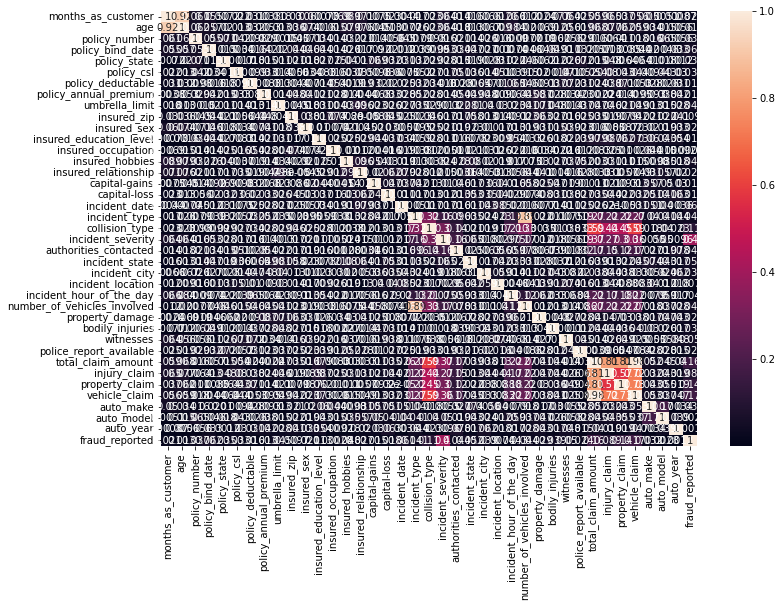

In [15]:
relation=data.corr().abs()  # cheking corelation between fetures vs feature and label
plt.figure(figsize=(12,8))
sns.heatmap(relation,annot=True)
plt.show()

In [16]:
# corelation with label
relation['fraud_reported'].sort_values(ascending=False) # cheking corelation

fraud_reported                 1.000000
incident_severity              0.401808
vehicle_claim                  0.170782
total_claim_amount             0.163969
property_claim                 0.139101
collision_type                 0.107403
injury_claim                   0.088812
policy_bind_date               0.061554
incident_date                  0.061271
incident_state                 0.052027
witnesses                      0.049974
insured_hobbies                0.048181
umbrella_limit                 0.044729
authorities_contacted          0.043636
number_of_vehicles_involved    0.043535
incident_type                  0.040893
incident_city                  0.039434
bodily_injuries                0.039184
policy_number                  0.036887
policy_state                   0.034587
policy_csl                     0.032509
auto_make                      0.032206
property_damage                0.028548
insured_relationship           0.026575
police_report_available        0.023824


In [17]:
#seprating features and label
x=data.drop(columns=['fraud_reported'])
y=data['fraud_reported']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=51)

In [21]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
##write one funtion and call as many as time to check accuracy score of different model
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\n========== Train Result========')
        print(f'Accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train==False:
    
        pred=clf.predict(x_test)
        
        print('\n========== Test Result========')
        print(f'Accuracy score: {accuracy_score(y_test,pred)*100:.2f}%')

        print('\n\n Test classification Report\n',classification_report(y_test,pred,digits=2))

In [23]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True) #train
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)#test


========== Train Result========
Accuracy score: 100.00%

========== Test Result========
Accuracy score: 75.51%


 Test classification Report
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       226
           1       0.47      0.40      0.43        68

    accuracy                           0.76       294
   macro avg       0.65      0.63      0.64       294
weighted avg       0.74      0.76      0.75       294



# lets tune parameter useing gridsearch cv

In [33]:
#randomclassifier
params={
    'n_estimators':[22,23],
    'criterion':['entropy'],
    'max_depth':[17,19],
    'min_samples_split':[16,18],
    'min_samples_leaf':[8,10]
    }
grid=GridSearchCV(random_clf,param_grid=params)
grid.fit(x_train,y_train)
print('best param=',grid.best_params_)

best param= {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 18, 'n_estimators': 22}


In [34]:
random_clf=grid.best_estimator_        
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=17, min_samples_leaf=10,
                       min_samples_split=18, n_estimators=22)

In [35]:
metric_score(random_clf,x_train,x_test,y_train,y_test, train=True) #train
metric_score(random_clf,x_train,x_test,y_train,y_test, train=False)#test


========== Train Result========
Accuracy score: 89.07%

========== Test Result========
Accuracy score: 75.85%


 Test classification Report
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       226
           1       0.45      0.21      0.28        68

    accuracy                           0.76       294
   macro avg       0.62      0.57      0.57       294
weighted avg       0.72      0.76      0.72       294

